In [89]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sys 
import os

# TODO: make more pythonic
# this line walks up file directory so rule-vetting is cwd
# os.chdir(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(sys.path[0])))))
print(os.getcwd())
print(sys.path[0])

import rulevetting.api.viz as viz
from rulevetting.projects.csi_pecarn.dataset import Dataset

outcome_def = 'outcome'  # output
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/system/linux/anaconda3.8/lib
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/ray/thirdparty_files
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# get data

In [90]:
#df_train, df_tune, _ = Dataset().get_data(load_csvs=True)
#df = df_train
#processed_feats = df.keys().values.tolist()
#print(processed_feats)

raw_data = Dataset().clean_data()
#print(df.head())

100%|██████████| 1/1 [00:00<00:00, 58.96it/s]
1it [00:00, 26.78it/s]

['analysisvariables.csv']
read all the csvs... ['analysisvariables.csv']
Index(['SITE', 'id', 'ControlType', 'StudySubjectID', 'AlteredMentalStatus',
       'LOC', 'ambulatory', 'FocalNeuroFindings', 'PainNeck',
       'PosMidNeckTenderness', 'TenderNeck', 'Torticollis', 'SubInj_Head',
       'SubInj_Face', 'SubInj_Ext', 'SubInj_TorsoTrunk', 'Predisposed',
       'HighriskDiving', 'HighriskFall', 'HighriskHanging', 'HighriskHitByCar',
       'HighriskMVC', 'HighriskOtherMV', 'AxialLoadAnyDoc', 'axialloadtop',
       'Clotheslining', 'AlteredMentalStatus2', 'FocalNeuroFindings2',
       'PainNeck2', 'PosMidNeckTenderness2', 'TenderNeck2', 'Torticollis2',
       'subinj_Head2', 'subinj_Face2', 'subinj_Ext2', 'subinj_TorsoTrunk2'],
      dtype='object')
merge all the dfs...


In [93]:
#raw_data.dropna(axis = 0, how = 'any', inplace = True) # complete cases, justified in paper
raw_data_numeric = raw_data.select_dtypes([np.number])
#raw_data_numeric.dropna(axis = 1, how = 'any', inplace = True) # drop columns with NA data

In [94]:
raw_data_numeric = raw_data_numeric.loc[:, (raw_data_numeric != raw_data_numeric.iloc[0]).any()] 
raw_data_numeric.describe()

,id,SITE,StudySubjectID,AlteredMentalStatus,LOC,ambulatory,FocalNeuroFindings,PainNeck,PosMidNeckTenderness,TenderNeck,...,FocalNeuroFindings2,PainNeck2,PosMidNeckTenderness2,TenderNeck2,Torticollis2,subinj_Head2,subinj_Face2,subinj_Ext2,subinj_TorsoTrunk2,outcome
count,3.314000e+03,3314.000000,3.314000e+03,3300.000000,3241.000000,3255.000000,3182.000000,3273.000000,3287.000000,3287.000000,...,3185.000000,3274.000000,3288.000000,3288.000000,3219.000000,3312.000000,3310.000000,3310.000000,3310.000000,3314.000000
mean,9.853706e+05,9.738081,1.003287e+06,0.183636,0.373650,0.227343,0.118165,0.352887,0.284758,0.376635,...,0.159498,0.401649,0.305049,0.403285,0.062131,0.160326,0.056798,0.110876,0.074018,0.162945
std,4.836199e+05,4.826812,4.837789e+05,0.387246,0.483847,0.419180,0.322854,0.477941,0.451368,0.484616,...,0.366197,0.490307,0.460498,0.490632,0.241431,0.366964,0.231490,0.314026,0.261840,0.369371
min,1.100010e+05,1.000000,1.100010e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.107250e+05,6.000000,6.408292e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.011614e+06,10.000000,1.021658e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.512485e+06,15.000000,1.512486e+06,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.713132e+06,17.000000,1.743314e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**correlations between features**

                             id      SITE  StudySubjectID  \
id                     1.000000  1.000000        0.999754   
SITE                   1.000000  1.000000        0.999754   
StudySubjectID         0.999754  0.999754        1.000000   
AlteredMentalStatus    0.044712  0.044714        0.042663   
LOC                    0.018703  0.018706        0.017234   
ambulatory            -0.010449 -0.010451       -0.009440   
FocalNeuroFindings     0.020554  0.020547        0.015251   
PainNeck              -0.080068 -0.080074       -0.081392   
PosMidNeckTenderness  -0.093966 -0.093973       -0.094526   
TenderNeck            -0.080213 -0.080220       -0.080476   
Torticollis           -0.040392 -0.040388       -0.040725   
SubInj_Head            0.001340  0.001338       -0.000011   
SubInj_Face           -0.025450 -0.025447       -0.025472   
SubInj_Ext             0.011183  0.011187        0.010551   
SubInj_TorsoTrunk     -0.029560 -0.029562       -0.030805   
Predisposed            0

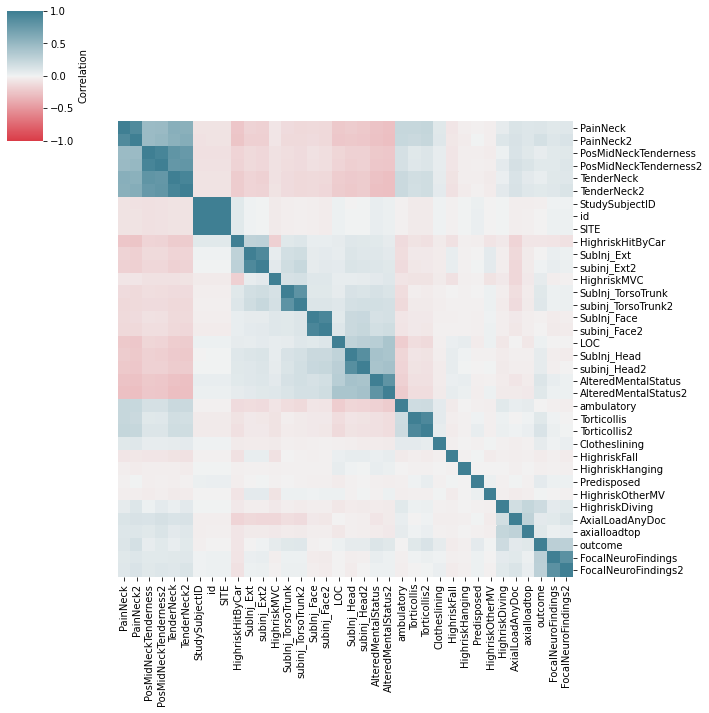

In [102]:
# corrs = df[feat_names + [outcome_def]].corr()
corrs = raw_data_numeric.corr(method='pearson')
print((corrs))
corrmap = sns.clustermap(corrs, cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
#                figsize=(12, 12))
corrmap.ax_row_dendrogram.set_visible(False)
corrmap.ax_col_dendrogram.set_visible(False)

plt.show()
# plt.savefig('results/corrplot.png', dpi=300, bbox_inches='tight')

**individual correlations with outcome**

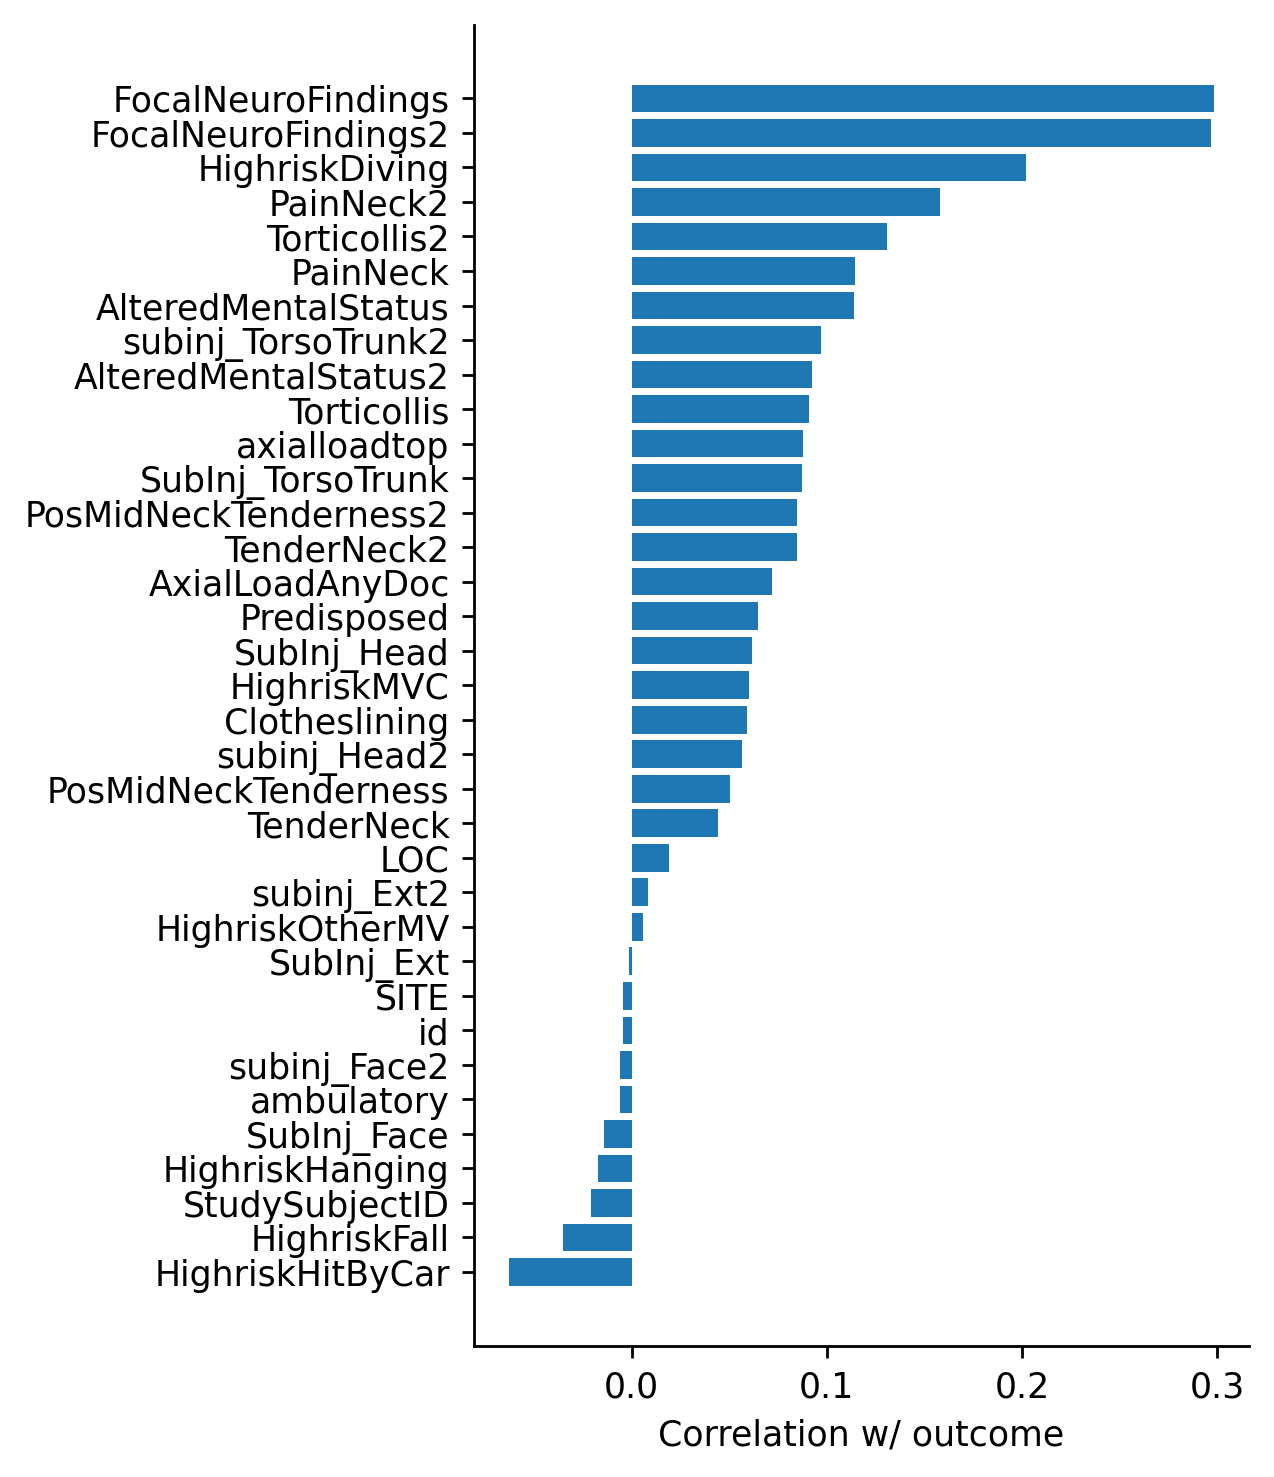

In [97]:
plt.figure(dpi=250, figsize=(4, 7))
vals = corrs[outcome_def]
args = np.argsort(vals)
labs = vals.index.values[args]
ax = plt.subplot(111)
plt.barh(labs[:-1], vals[args][:-1])
#plt.barh(labs[:-1], vals[args][:-1])
plt.xlabel('Correlation w/ outcome')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

**subgroup risks (with sizes)**

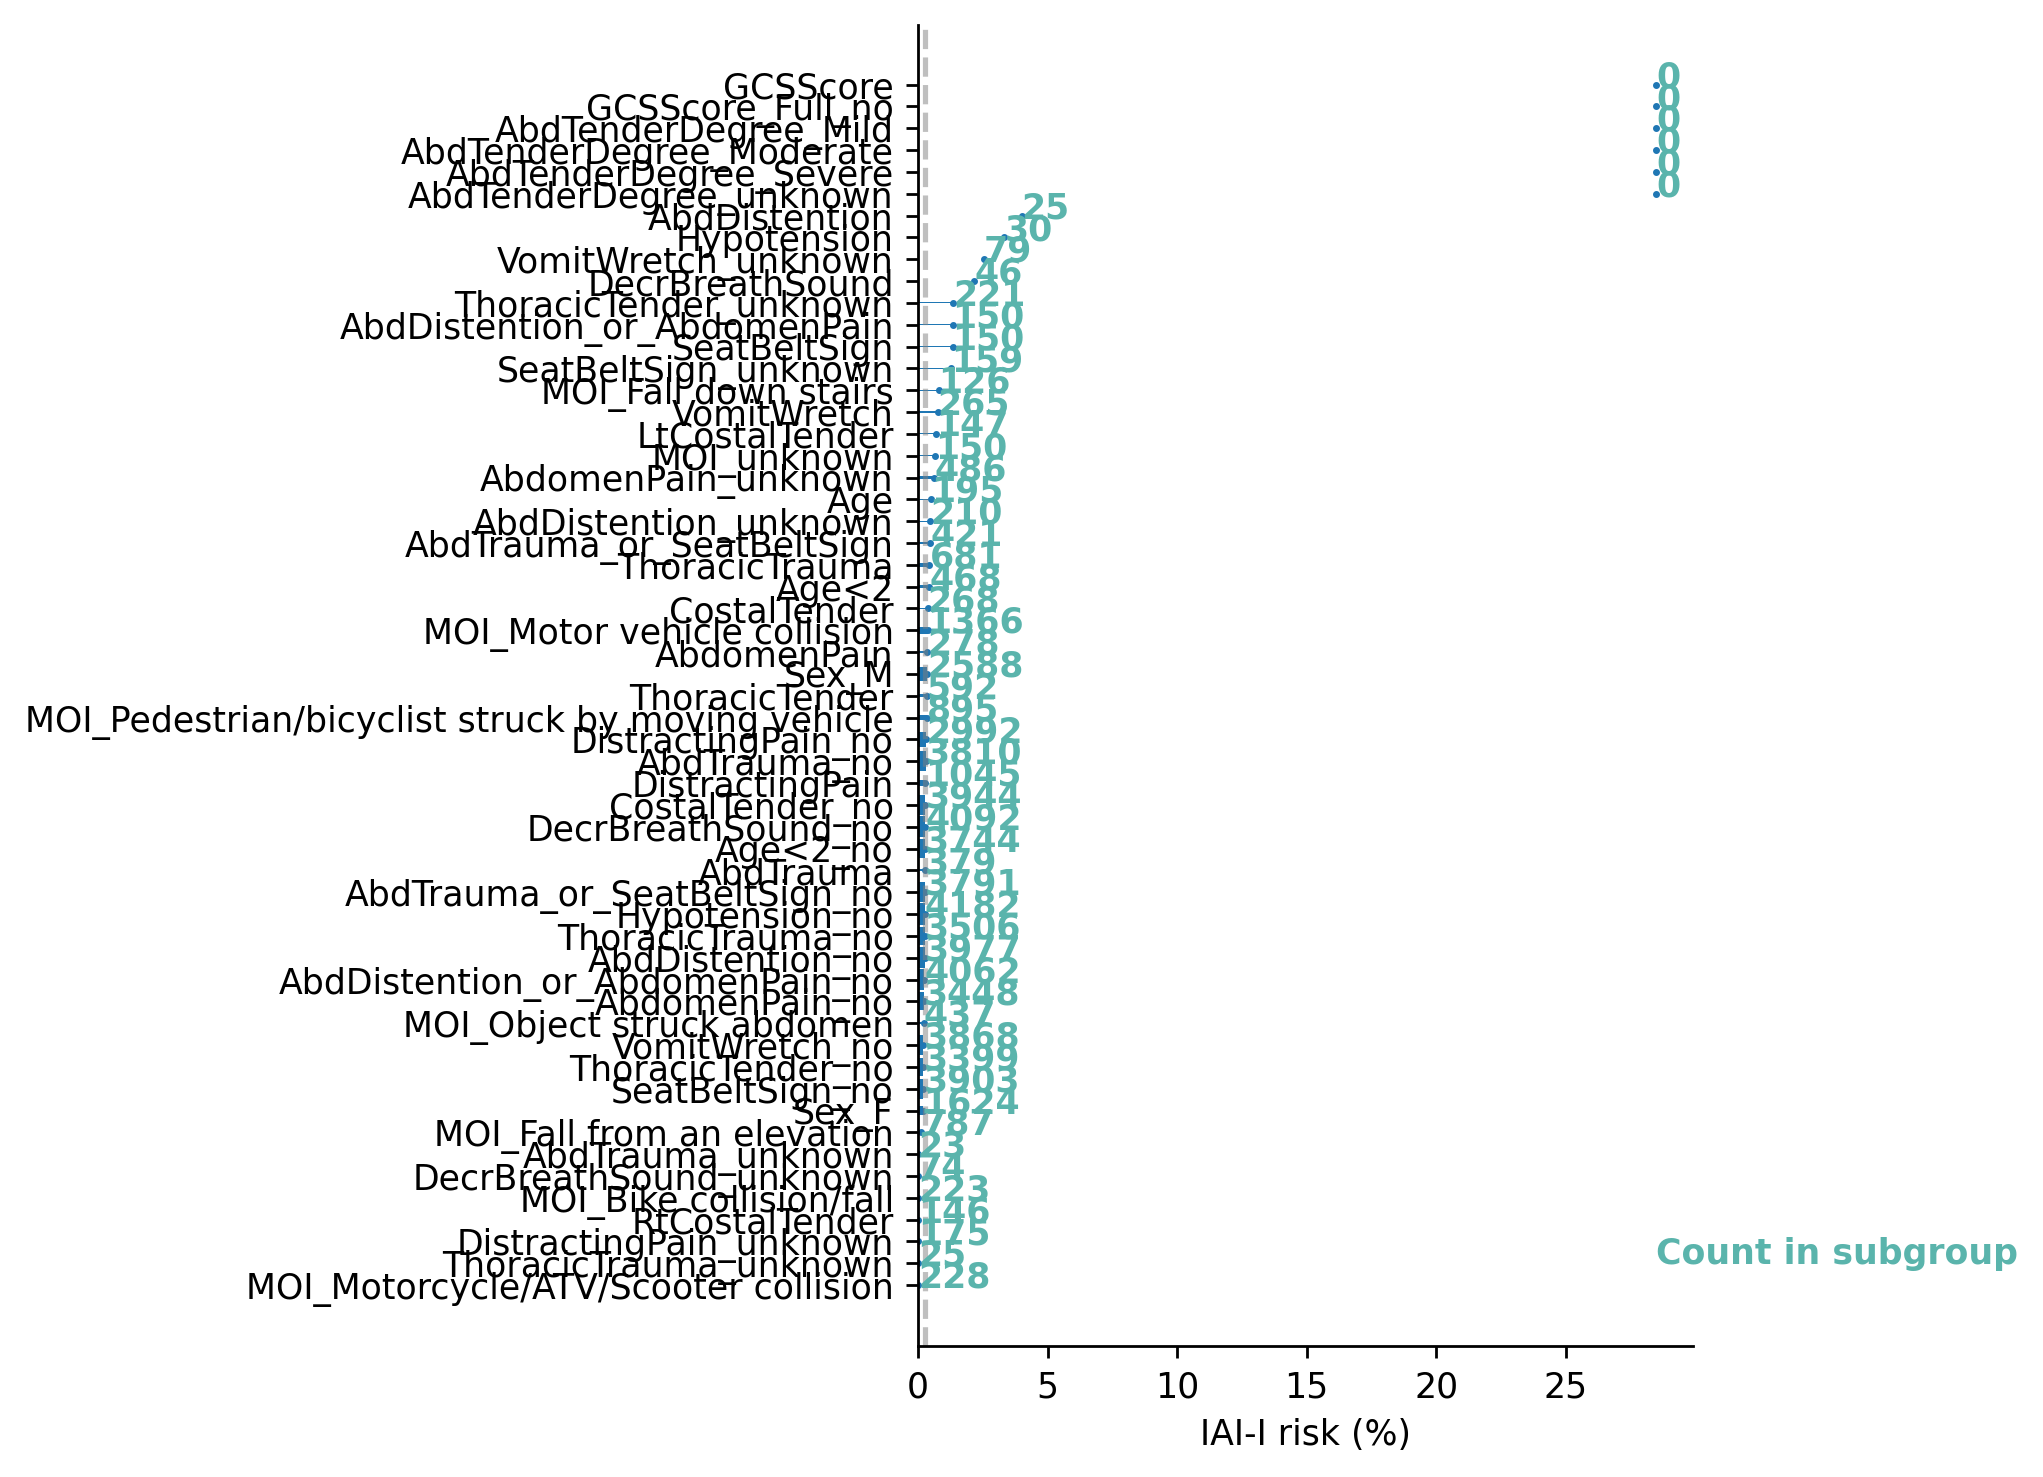

In [98]:
def plot_subgroup_risks(df, head=None, tail=None):
    plt.figure(dpi=250, figsize=(4, 7))
    ks = np.array([k for k in df.keys()
                   if not k == outcome_def])
    mean_risk_baseline = df[outcome_def].mean() * 100
    if head is not None or tail is not None:
        ks = np.array([k for k in ks
                       if np.sum(df[k]) >= 10
                       and np.abs(np.mean(df[k]) - mean_risk_baseline) > 1
                       and not np.sum([df[k] == 1]) == 0])  # should have at least one IAI-I
    vals = np.array([np.mean(df[outcome_def][df[k] == 1]) for k in ks])
    vals[np.isnan(vals)] = mean_risk_baseline
    counts = np.array([np.sum([df[k] == 1]) for k in ks])
    args = np.argsort(vals)
    if head is not None:
        args = args[:head]
    if tail is not None:
        args = args[-tail:]
    labs = ks[args]
    vals = vals[args] * 100
    counts = counts[args]
    counts_norm = counts / np.nanmax(counts)
    ax = plt.subplot(111)
    plt.plot(vals, np.arange(vals.size), 'o', ms=1)
    plt.barh(y=np.arange(vals.size), width=vals, height=1.0 * counts_norm)
    plt.yticks(np.arange(vals.size), [lab.replace('_yes', '') for lab in labs])
    for i, (v, c) in enumerate(zip(vals, counts)):
        ax.text(v, i - 0.1, str(c), color=viz.cg, fontweight='bold')
    plt.axvline(mean_risk_baseline, color='gray', linestyle='--', alpha=0.5)
    ax.text(vals.max(), 1, 'Count in subgroup', color=viz.cg, fontweight='bold')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.xlabel('IAI-I risk (%)')
    plt.show()


# plot_subgroup_risks(df[processed_feats + [outcome_def]])
# dd = df[(df['AbdTenderDegree_None']==1) & (df['GCSScore_Full_yes'] == 1)] # low-risk group left to split
# plot_subgroup_risks(dd[[k for k in processed_feats if not k in ['AbdTenderDegree_None', 'GCSScore_Full_yes']] + [outcome_def]])
dd = df[(df['AbdTenderDegree_None'] == 1) & (
            df['GCSScore_Full_yes'] == 1)]  # & (df['DecrBreathSound_yes'] == 0)] # low-risk group left to split
plot_subgroup_risks(dd[[k for k in processed_feats
                        if not k in ['AbdTenderDegree_None', 'GCSScore_Full_yes']]])

**joint correlations (or risks) with outcome joint**

/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c

/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c

/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c

/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c

/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c

/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c

/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c

/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c

/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c

/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c

/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c

/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c

/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c

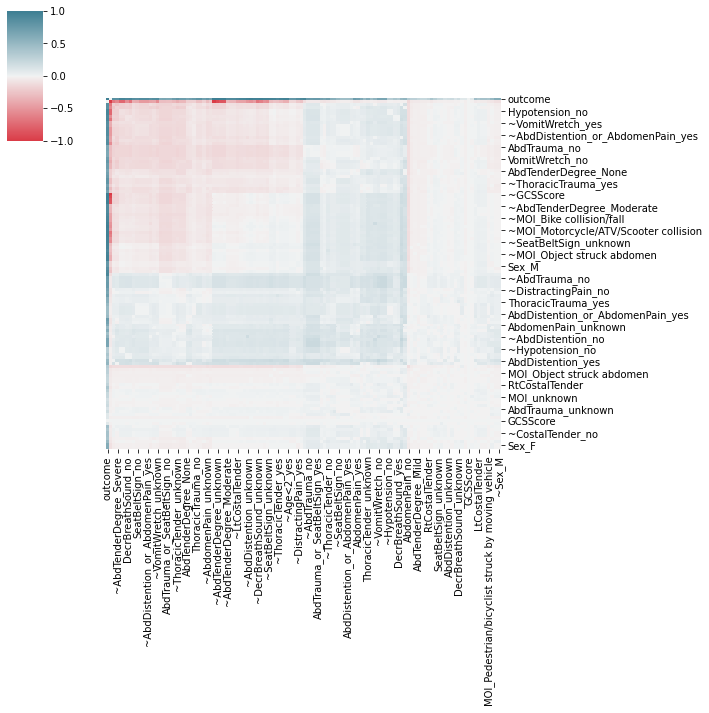

In [99]:
func = lambda x, y: np.corrcoef(x, y)[0, 1]  # corr
# func = lambda x, y: np.mean(y[x]) # frac high-risk
d = len(processed_feats)
mat = np.zeros((2 * d, 2 * d))
y = df[outcome_def]
for r in range(d):
    for c in range(d):
        xr = df[processed_feats[r]] == 1
        xc = df[processed_feats[c]] == 1
        mat[2 * r, 2 * c] = func(xr & xc, y)
        mat[2 * r + 1, 2 * c] = func(~xr & xc, y)
        mat[2 * r, 2 * c + 1] = func(xr & ~xc, y)
        mat[2 * r + 1, 2 * c + 1] = func(~xr & ~xc, y)

fs = np.array([[x, '~' + x] for x in processed_feats]).flatten()
mat[np.isnan(mat)] = 0
matt = pd.DataFrame(mat, index=fs, columns=fs)
vabs = np.max([np.abs(np.min(mat)), np.max(mat)])
vmin = -vabs
cmap = viz.cmap_div
if np.min(mat) >= 0:
    vmin = 0
    cmap = 'Blues'
corrmap = sns.clustermap(matt, cmap=cmap, vmin=vmin, vmax=vabs,
                         dendrogram_ratio=0.2, figsize=(10, 10), )
corrmap.ax_row_dendrogram.set_visible(False)
corrmap.ax_col_dendrogram.set_visible(False)
#                row_cluster=False, col_cluster=False)
# plt.savefig('dendrogram.png', dpi=400)
# plt.tight_layout()
plt.show()

# features scatter plots

## continuous features

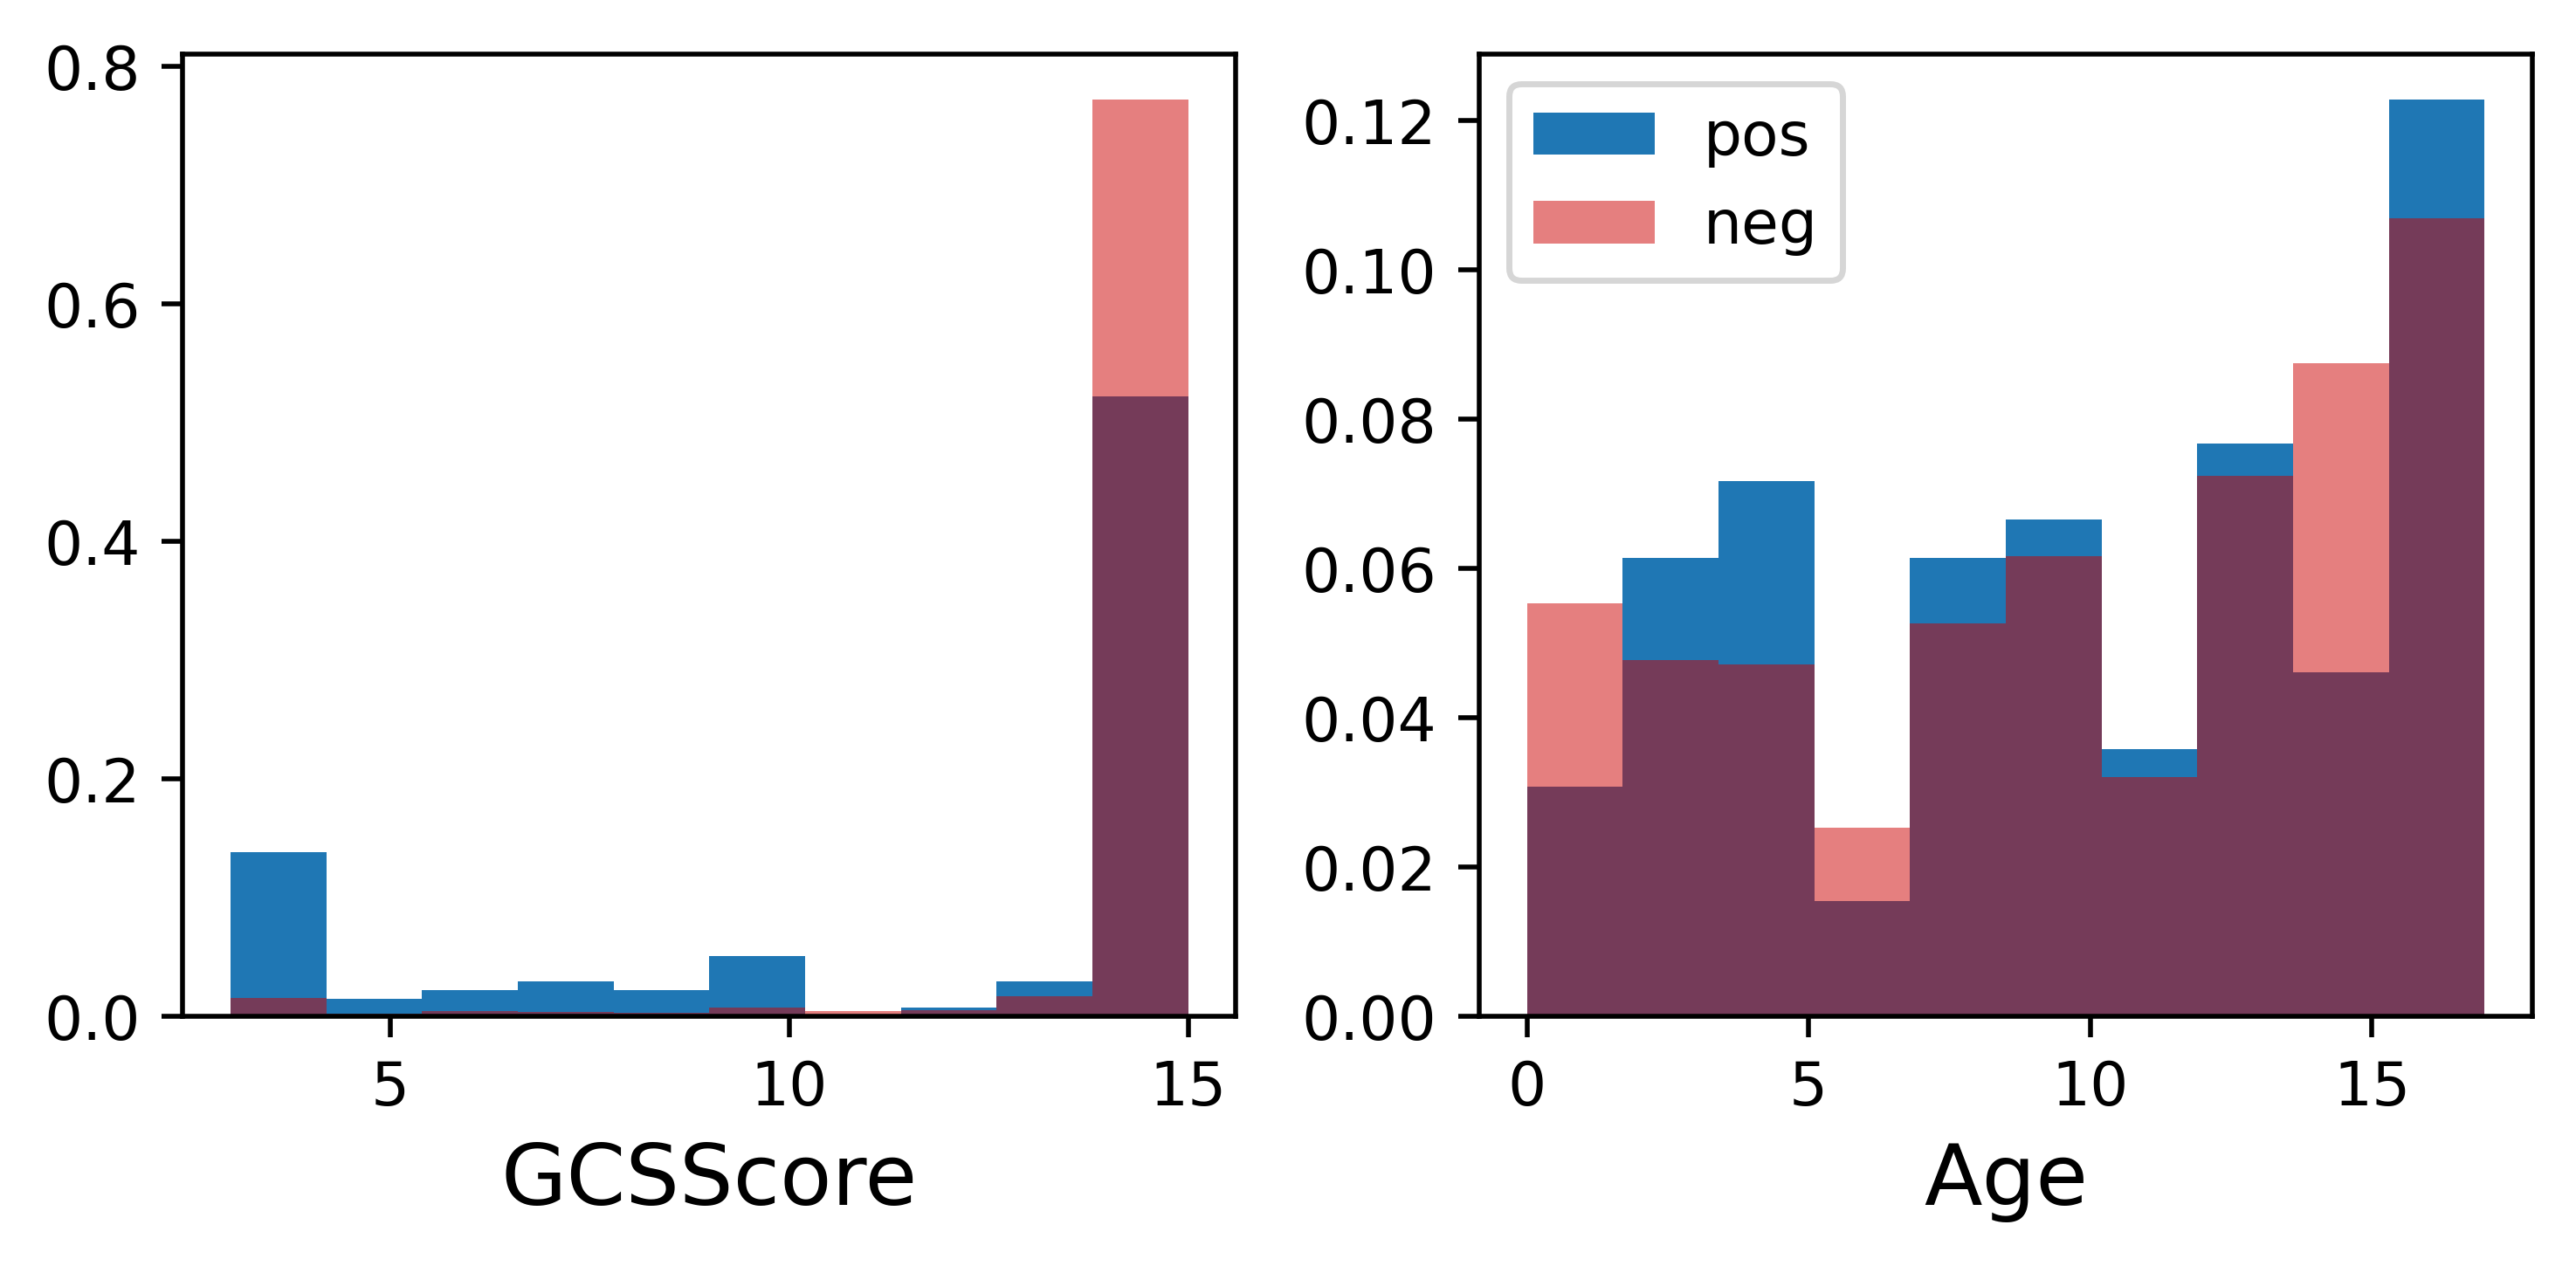

In [56]:
feats_numerical = ['GCSScore', 'Age']
# feats_categorical = ['AbdTenderDegree', 'Race', 'MOI']
R, C, = 1, 2
plt.figure(figsize=(6, 3), dpi=500)
for i in range(len(feats_numerical)):
    plt.subplot(R, C, i + 1)
    feat = feats_numerical[i]
    plt.hist(df[df[outcome_def] == 1][feat], density=True, alpha=1, label='pos', color=viz.cb)
    plt.hist(df[df[outcome_def] == 0][feat], density=True, alpha=0.5, label='neg', color=viz.cr)
    plt.xlabel(feat, fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

**we can cut GCSScore as whether it is 15 or not (14 is already pretty bad)**

In [57]:
feat = 'GCSScore'
print(np.unique(df[df[outcome_def] == 1][feat], return_counts=True))
print(np.unique(df[df[outcome_def] == 0][feat], return_counts=True))

(array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 12., 13., 14., 15.]), array([18,  1,  2,  3,  4,  3,  3,  4,  1,  4,  9, 63]))
(array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.]), array([ 119,   13,   16,   36,   31,   23,   35,   27,   37,   41,  145,
        372, 6216]))


## scatter plots

/Users/chandan/venvs/rule-vetting/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/chandan/venvs/rule-vetting/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/chandan/venvs/rule-vetting/lib/python3.7/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg

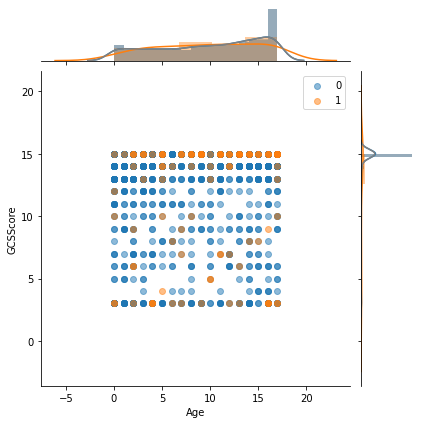

In [62]:
viz.jointplot_grouped('Age', 'GCSScore', 'outcome', df)

/Users/chandan/venvs/rule-vetting/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/chandan/venvs/rule-vetting/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/chandan/venvs/rule-vetting/lib/python3.7/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg

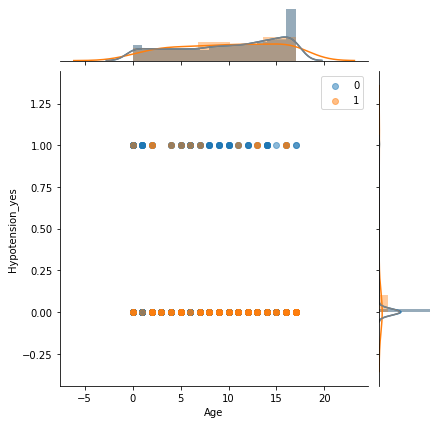

In [64]:
viz.jointplot_grouped('Age', 'Hypotension_yes', 'outcome', df)